In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [9]:
# Load your spreadsheet data into a Pandas DataFrame
df = pd.read_csv(r"..\\data\2025\dox-mzml.pg_matrix (1).tsv", sep='\t', index_col=2)
df
df.drop(['Protein.Group', 'Protein.Names', 'First.Protein.Description','N.Sequences','N.Proteotypic.Sequences'],axis=1, inplace=True)
df

,Y:\MS-data\2025\Jesus\dox\A1_20250325224911.mzML,Y:\MS-data\2025\Jesus\dox\A2.mzML,Y:\MS-data\2025\Jesus\dox\A3.mzML,Y:\MS-data\2025\Jesus\dox\A4.mzML,Y:\MS-data\2025\Jesus\dox\A5.mzML,Y:\MS-data\2025\Jesus\dox\B1.mzML,Y:\MS-data\2025\Jesus\dox\B2.mzML,Y:\MS-data\2025\Jesus\dox\B3.mzML,Y:\MS-data\2025\Jesus\dox\B4.mzML,Y:\MS-data\2025\Jesus\dox\B5.mzML,...,Y:\MS-data\2025\Jesus\dox\G1.mzML,Y:\MS-data\2025\Jesus\dox\G2.mzML,Y:\MS-data\2025\Jesus\dox\G3.mzML,Y:\MS-data\2025\Jesus\dox\G4.mzML,Y:\MS-data\2025\Jesus\dox\G5.mzML,Y:\MS-data\2025\Jesus\dox\H1.mzML,Y:\MS-data\2025\Jesus\dox\H2.mzML,Y:\MS-data\2025\Jesus\dox\H3.mzML,Y:\MS-data\2025\Jesus\dox\H4.mzML,Y:\MS-data\2025\Jesus\dox\H5.mzML
Genes,,,,,,,,,,,,,,,,,,,,,
NUDT4B,3.008760e+05,271631.00,376113.00,540274.0,351296.00,317962.00,290102.0,281447.0,341017.00,217988.0,...,210496.0,227153.00,153160.0,284194.0,1.704570e+05,175533.0,202248.00,240977.00,199635.00,218914.0
NBPF1;NBPF10;NBPF19;NBPF20;NBPF8;NBPF9,6.337670e+02,4427.68,1251.69,NaN,2640.96,3750.39,NaN,2113.0,1272.35,NaN,...,NaN,3350.62,NaN,NaN,5.718320e+02,NaN,4078.99,2827.11,3619.25,NaN
GATD3;GATD3B,1.133240e+07,14406700.00,10082500.00,15849200.0,10683900.00,10456300.00,11658200.0,11083200.0,10873100.00,11697400.0,...,13291700.0,12134200.00,12631100.0,14834400.0,1.419360e+07,13517800.0,13648200.00,14531700.00,16095700.00,15796100.0
PIGBOS1,1.394600e+05,194791.00,108791.00,NaN,178367.00,150447.00,NaN,NaN,210616.00,245852.0,...,137284.0,230486.00,225479.0,289233.0,3.942920e+05,208255.0,381987.00,320989.00,348923.00,281545.0
TMEM275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16772.4,14457.80,NaN,23313.9,1.337090e+04,NaN,NaN,NaN,14047.20,20005.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZHX2,4.634230e+05,324688.00,565386.00,646476.0,194226.00,266685.00,283692.0,265274.0,379711.00,415009.0,...,101632.0,96704.40,113519.0,142995.0,1.083400e+05,101857.0,NaN,141037.00,124151.00,99595.8
MORC2,2.344580e+06,2768510.00,1996840.00,2748110.0,2603180.00,2766930.00,2656800.0,2573480.0,2568800.00,2267720.0,...,2780680.0,2615400.00,2713140.0,3142120.0,2.551840e+06,2742200.0,2822970.00,2811240.00,2550620.00,2782980.0
IVNS1ABP,2.012130e+06,1704340.00,1874520.00,2295240.0,1184960.00,1374190.00,1462070.0,1553430.0,1629440.00,2045390.0,...,952904.0,908665.00,847274.0,915982.0,8.664810e+05,914912.0,826824.00,896257.00,627669.00,1089860.0


In [10]:
df.columns = [col.split("\\")[-1].split(".")[0] for col in df.columns]
df

,A1_20250325224911,A2,A3,A4,A5,B1,B2,B3,B4,B5,...,G1,G2,G3,G4,G5,H1,H2,H3,H4,H5
Genes,,,,,,,,,,,,,,,,,,,,,
NUDT4B,3.008760e+05,271631.00,376113.00,540274.0,351296.00,317962.00,290102.0,281447.0,341017.00,217988.0,...,210496.0,227153.00,153160.0,284194.0,1.704570e+05,175533.0,202248.00,240977.00,199635.00,218914.0
NBPF1;NBPF10;NBPF19;NBPF20;NBPF8;NBPF9,6.337670e+02,4427.68,1251.69,NaN,2640.96,3750.39,NaN,2113.0,1272.35,NaN,...,NaN,3350.62,NaN,NaN,5.718320e+02,NaN,4078.99,2827.11,3619.25,NaN
GATD3;GATD3B,1.133240e+07,14406700.00,10082500.00,15849200.0,10683900.00,10456300.00,11658200.0,11083200.0,10873100.00,11697400.0,...,13291700.0,12134200.00,12631100.0,14834400.0,1.419360e+07,13517800.0,13648200.00,14531700.00,16095700.00,15796100.0
PIGBOS1,1.394600e+05,194791.00,108791.00,NaN,178367.00,150447.00,NaN,NaN,210616.00,245852.0,...,137284.0,230486.00,225479.0,289233.0,3.942920e+05,208255.0,381987.00,320989.00,348923.00,281545.0
TMEM275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16772.4,14457.80,NaN,23313.9,1.337090e+04,NaN,NaN,NaN,14047.20,20005.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZHX2,4.634230e+05,324688.00,565386.00,646476.0,194226.00,266685.00,283692.0,265274.0,379711.00,415009.0,...,101632.0,96704.40,113519.0,142995.0,1.083400e+05,101857.0,NaN,141037.00,124151.00,99595.8
MORC2,2.344580e+06,2768510.00,1996840.00,2748110.0,2603180.00,2766930.00,2656800.0,2573480.0,2568800.00,2267720.0,...,2780680.0,2615400.00,2713140.0,3142120.0,2.551840e+06,2742200.0,2822970.00,2811240.00,2550620.00,2782980.0
IVNS1ABP,2.012130e+06,1704340.00,1874520.00,2295240.0,1184960.00,1374190.00,1462070.0,1553430.0,1629440.00,2045390.0,...,952904.0,908665.00,847274.0,915982.0,8.664810e+05,914912.0,826824.00,896257.00,627669.00,1089860.0


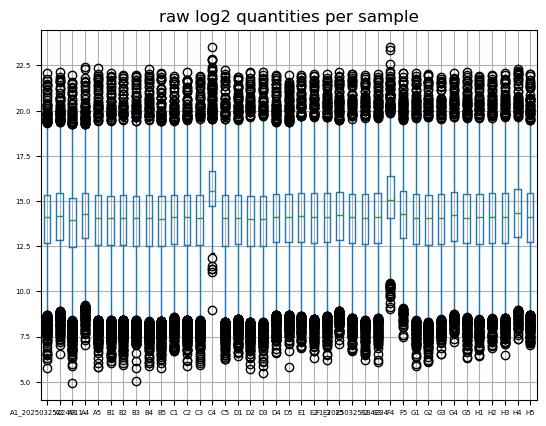

In [11]:
np.log(df).boxplot(fontsize=5)
#plt.axhline(df.count(axis=0), color='red', linestyle='--', label='Mean')
plt.title('raw log2 quantities per sample')
#plt.savefig(r"C:\Users\MunozestraJ\OneDrive - Cedars-Sinai Health System\Proteomics\Dox experiment/boxquant_raw.svg", bbox_inches='tight')
plt.show()

In [12]:
df.T.index

Index(['A1_20250325224911', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1',
       'E2', 'E3', 'E5', 'F1_20250325184234', 'F2', 'F3', 'F4', 'F5', 'G1',
       'G2', 'G3', 'G4', 'G5', 'H1', 'H2', 'H3', 'H4', 'H5'],
      dtype='object')

In [13]:
dropthese = df.T.index[df.count()<7500]
dropthese

Index(['C4', 'F4'], dtype='object')

In [14]:
df = df.drop(dropthese, axis=1)

In [15]:
# Assuming your DataFrame is named 'df'
column_sums = df.sum(axis=0)  # Calculate the sum of each column

# Divide each element by the corresponding column sum
df_normalized = df.div(column_sums, axis=1)
df_normalized

,A1_20250325224911,A2,A3,A4,A5,B1,B2,B3,B4,B5,...,G1,G2,G3,G4,G5,H1,H2,H3,H4,H5
Genes,,,,,,,,,,,,,,,,,,,,,
NUDT4B,3.240442e-06,2.581984e-06,4.647683e-06,0.000005,3.228024e-06,3.072866e-06,2.793175e-06,2.792574e-06,3.182371e-06,2.127471e-06,...,1.973233e-06,2.146734e-06,1.525413e-06,2.488230e-06,1.606919e-06,1.670601e-06,1.899179e-06,2.181306e-06,1.470802e-06,1.987760e-06
NBPF1;NBPF10;NBPF19;NBPF20;NBPF8;NBPF9,6.825685e-09,4.208723e-08,1.546732e-08,NaN,2.426752e-08,3.624473e-08,NaN,2.096561e-08,1.187357e-08,NaN,...,NaN,3.166540e-08,NaN,NaN,5.390730e-09,NaN,3.830314e-08,2.559080e-08,2.666466e-08,NaN
GATD3;GATD3B,1.220502e-04,1.369426e-04,1.245909e-04,0.000157,9.817330e-05,1.010524e-04,1.122481e-04,1.099698e-04,1.014678e-04,1.141617e-04,...,1.245992e-04,1.146756e-04,1.258007e-04,1.298810e-04,1.338048e-04,1.286530e-04,1.281614e-04,1.315399e-04,1.185843e-04,1.434301e-04
PIGBOS1,1.501987e-06,1.851582e-06,1.344346e-06,NaN,1.638997e-06,1.453958e-06,NaN,NaN,1.965469e-06,2.399412e-06,...,1.286929e-06,2.178233e-06,2.245681e-06,2.532349e-06,3.717039e-06,1.982026e-06,3.586991e-06,2.905569e-06,2.570674e-06,2.556455e-06
TMEM275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.572280e-07,1.366350e-07,NaN,2.041224e-07,1.260491e-07,NaN,NaN,NaN,1.034921e-07,1.816537e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZHX2,4.991077e-06,3.086316e-06,6.986558e-06,0.000006,1.784723e-06,2.577312e-06,2.731458e-06,2.632102e-06,3.543463e-06,4.050313e-06,...,9.527195e-07,9.139156e-07,1.130604e-06,1.251977e-06,1.021334e-06,9.694039e-07,NaN,1.276657e-06,9.146768e-07,9.043393e-07
MORC2,2.525118e-05,2.631602e-05,2.467524e-05,0.000027,2.392036e-05,2.674032e-05,2.558034e-05,2.553459e-05,2.397204e-05,2.213199e-05,...,2.606667e-05,2.471713e-05,2.702180e-05,2.751049e-05,2.405651e-05,2.609835e-05,2.650867e-05,2.544714e-05,1.879158e-05,2.526972e-05
IVNS1ABP,2.167069e-05,1.620057e-05,2.316372e-05,0.000023,1.088848e-05,1.328052e-05,1.407718e-05,1.541345e-05,1.520594e-05,1.996214e-05,...,8.932720e-06,8.587439e-06,8.438513e-06,8.019782e-06,8.168422e-06,8.707495e-06,7.764166e-06,8.112854e-06,4.624322e-06,9.896032e-06


In [16]:
# Handle missing values (e.g., impute with mean or median), imputation may contain very small numbers
# Create a KNN imputer object
imputer = KNNImputer(n_neighbors=5)  # Adjust n_neighbors as needed

# Impute missing values using KNN
df_imputed = imputer.fit_transform(df_normalized)

# Create a new DataFrame with imputed values
df_imputed = pd.DataFrame(df_imputed, columns=df.columns, index= df.index)
df_imputed*10e6

,A1_20250325224911,A2,A3,A4,A5,B1,B2,B3,B4,B5,...,G1,G2,G3,G4,G5,H1,H2,H3,H4,H5
Genes,,,,,,,,,,,,,,,,,,,,,
NUDT4B,32.404415,25.819837,46.476835,53.446932,32.280242,30.728661,27.931753,27.925742,31.823709,21.274710,...,19.732333,21.467345,15.254128,24.882301,16.069188,16.706008,18.991793,21.813064,14.708017,19.877599
NBPF1;NBPF10;NBPF19;NBPF20;NBPF8;NBPF9,0.068257,0.420872,0.154673,0.355072,0.242675,0.362447,0.264736,0.209656,0.118736,0.120313,...,0.212375,0.316654,0.209489,0.293937,0.053907,0.214132,0.383031,0.255908,0.266647,0.328676
GATD3;GATD3B,1220.502121,1369.426340,1245.909310,1567.891690,981.732992,1010.523591,1122.480941,1099.697570,1014.677784,1141.616955,...,1245.991609,1146.755943,1258.007390,1298.809983,1338.047911,1286.530001,1281.613599,1315.398996,1185.843292,1434.300888
PIGBOS1,15.019875,18.515824,13.443463,21.826391,16.389967,14.539583,20.028749,26.996051,19.654687,23.994119,...,12.869288,21.782333,22.456813,25.323485,37.170386,19.820260,35.869912,29.055693,25.706741,25.564554
TMEM275,0.419337,0.375674,0.542128,0.398746,0.193224,0.255217,0.234749,0.222062,0.254141,0.404640,...,1.572280,1.366350,0.935646,2.041224,1.260491,0.712907,1.133143,0.578889,1.034921,1.816537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZHX2,49.910765,30.863161,69.865577,63.953029,17.847235,25.773121,27.314582,26.321024,35.434634,40.503130,...,9.527195,9.139156,11.306042,12.519774,10.213343,9.694039,8.929886,12.766567,9.146768,9.043393
MORC2,252.511812,263.160232,246.752447,271.858443,239.203633,267.403196,255.803414,255.345902,239.720438,221.319917,...,260.666728,247.171259,270.217967,275.104947,240.565056,260.983486,265.086733,254.471416,187.915755,252.697228
IVNS1ABP,216.706870,162.005740,231.637185,227.058004,108.884801,132.805238,140.771792,154.134473,152.059355,199.621446,...,89.327203,85.874387,84.385125,80.197822,81.684216,87.074948,77.641658,81.128537,46.243225,98.960324


In [17]:
df_imputed = np.log(df_imputed*10e6)

In [18]:
group_labels = [col[0] for col in df.columns]
group_labels

['A',
 'A',
 'A',
 'A',
 'A',
 'B',
 'B',
 'B',
 'B',
 'B',
 'C',
 'C',
 'C',
 'C',
 'D',
 'D',
 'D',
 'D',
 'D',
 'E',
 'E',
 'E',
 'E',
 'F',
 'F',
 'F',
 'F',
 'G',
 'G',
 'G',
 'G',
 'G',
 'H',
 'H',
 'H',
 'H',
 'H']

In [19]:
df_imputed.values.T.shape

(37, 9782)

In [20]:
print(len(group_labels))    # Should be 39 now
print(group_labels)         # Should match samples

37
['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D', 'D', 'E', 'E', 'E', 'E', 'F', 'F', 'F', 'F', 'G', 'G', 'G', 'G', 'G', 'H', 'H', 'H', 'H', 'H']


In [21]:
from sklearn.preprocessing import StandardScaler

# Step 1: Initialize the scaler
scaler = StandardScaler()

# Step 2: Transpose df_imputed (samples as rows) and scale
df_scaled_array = scaler.fit_transform(df_imputed.values.T)

# Step 3: Build df_scaled DataFrame
df_scaled = pd.DataFrame(df_scaled_array, columns=df_imputed.index, index=df_imputed.columns)

# Step 4: Ensure all column names are strings (PCA compatibility if needed later)
df_scaled.columns = df_scaled.columns.astype(str)

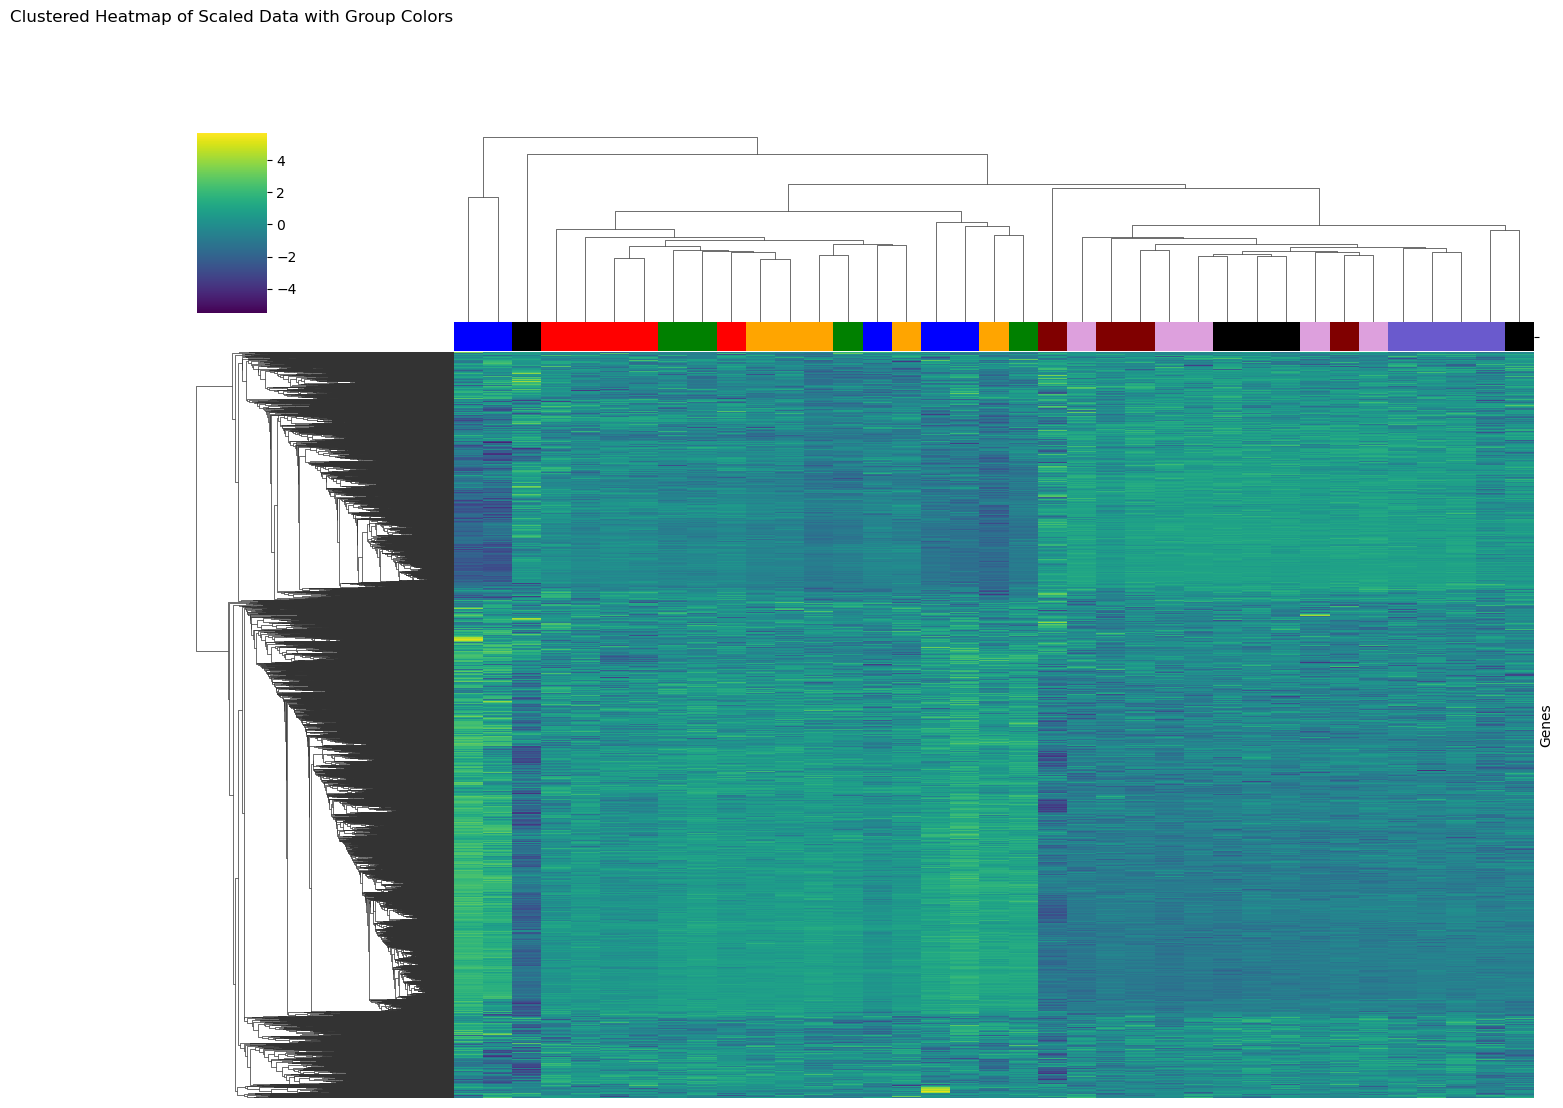

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Build group labels from df_imputed
group_labels = [col[0] for col in df_imputed.columns]

# Color map
group_color_map = {
    'A': 'blue',
    'B': 'orange',
    'C': 'green',
    'D': 'red',
    'E': 'slateblue',
    'F': 'maroon',
    'G': 'plum',
    'I': 'lightgrey',
}

mapped_labels = [group_color_map.get(label, 'black') for label in group_labels]
col_colors = pd.Series(mapped_labels, index=df_imputed.columns)

# Clustered Heatmap
sns.clustermap(
    df_scaled.T,               # genes as rows, samples as columns
    cmap="viridis",
    col_colors=col_colors,
    z_score=0,
    figsize=(14, 10),
    xticklabels=False,
    yticklabels=False,
)

plt.title("Clustered Heatmap of Scaled Data with Group Colors", pad=80)

# Step 4: Export as SVG
#plt.savefig(r"C:\Users\MunozestraJ\OneDrive - Cedars-Sinai Health System\Proteomics\Dox experiment\Heatmap.svg", format="svg")

plt.show()

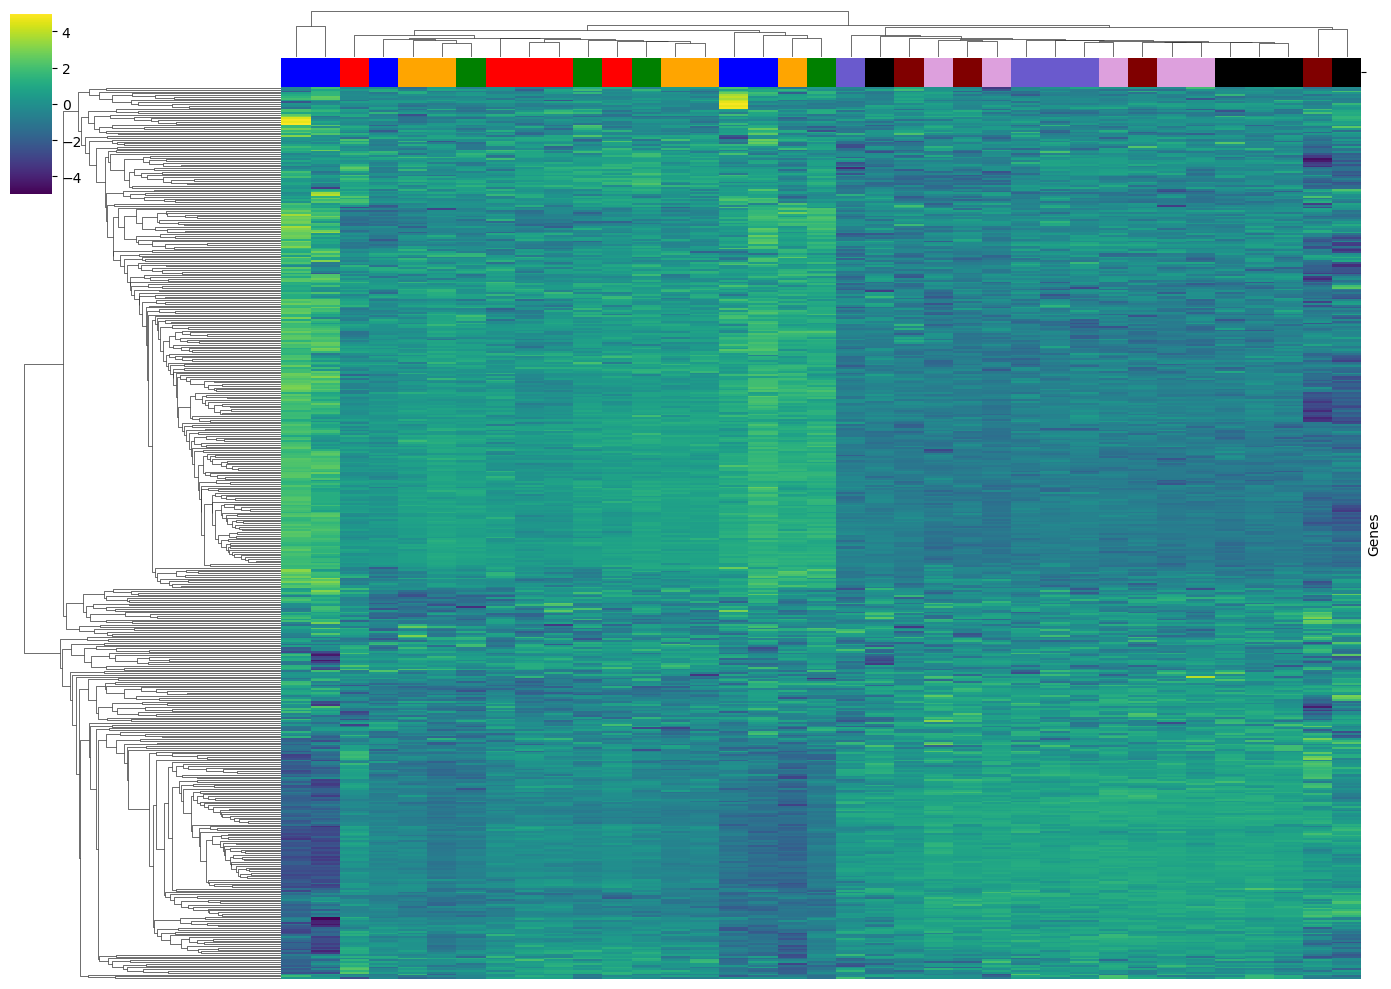

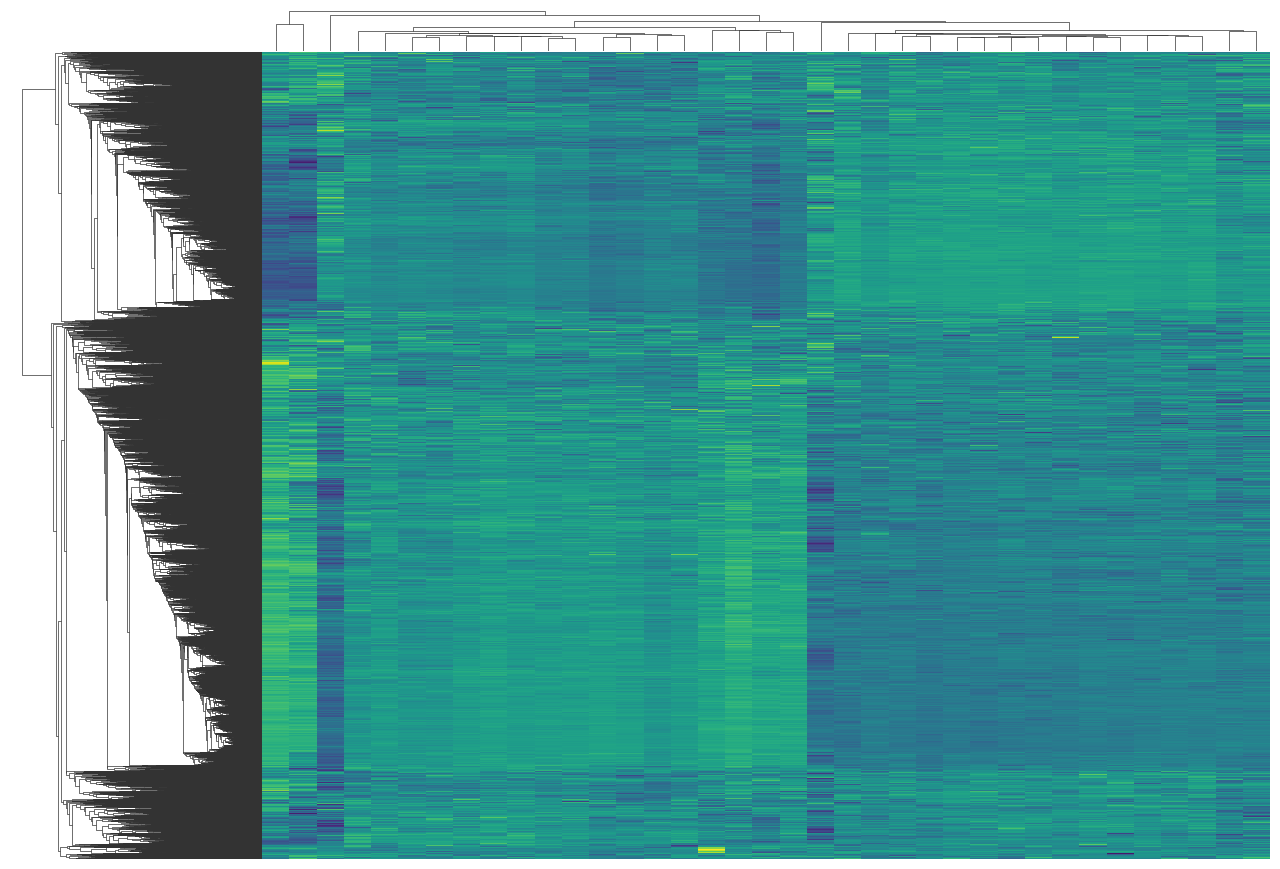

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Build group labels from df_imputed
group_labels = [col[0] for col in df_imputed.columns]

# Color map
group_color_map = {
    'A': 'blue',
    'B': 'orange',
    'C': 'green',
    'D': 'red',
    'E': 'slateblue',
    'F': 'maroon',
    'G': 'plum',
    'I': 'lightgrey',
}

# Map labels to colors
mapped_labels = [group_color_map.get(label, 'black') for label in group_labels]
col_colors = pd.Series(mapped_labels, index=df_imputed.columns)

# Select top 500 variable genes
gene_variability = df_scaled.T.std(axis=1)
top_genes = gene_variability.sort_values(ascending=False).head(500).index
df_scaled_top = df_scaled[top_genes]

# Clustered Heatmap
# Plot
g = sns.clustermap(
    df_scaled_top.T,
    cmap="viridis",
    col_colors=col_colors,
    z_score=0,
    figsize=(14, 10),
    xticklabels=False,
    yticklabels=False,   # 🔥 Hide overwhelming gene names
    dendrogram_ratio=(0.2, 0.05),  # 🔥 Optional: make dendrograms nicer
    cbar_pos=(0.01, 0.8, 0.03, 0.18)  # 🔥 Optional: move colorbar
)

# Create a new figure for the colorbar
fig_cbar, ax_cbar = plt.subplots(figsize=(2, 6))

# Copy the colorbar to the new figure
cbar = g.ax_cbar.get_children()[0]  # grab the actual colorbar
fig_cbar.colorbar(cbar, cax=ax_cbar)

# Save only the colorbar
#fig_cbar.savefig(r"C:\Users\MunozestraJ\OneDrive - Cedars-Sinai Health System\Proteomics\Dox experiment\colorbar_only.svg", format="svg", bbox_inches="tight")
plt.close(fig_cbar)

# Create patches as handles for the legend
handles = [mpatches.Patch(color=color, label=group) for group, color in group_color_map.items()]
legend_fig, legend_ax = plt.subplots(figsize=(4, 2))
# Hide axes
legend_ax.axis('off')

# Add legend
legend = legend_ax.legend(
    handles=handles,
    title="Groups",
    loc='center',
    ncol=4,
    fontsize=10,
    title_fontsize=12,
    frameon=False
)
# Save only the legend
#legend_fig.savefig(r"C:\Users\MunozestraJ\OneDrive - Cedars-Sinai Health System\Proteomics\Dox experiment\legend_only.svg", format="svg", bbox_inches="tight")
plt.close(legend_fig)

g = sns.clustermap(
    df_scaled.T,
    cmap="viridis",
    col_colors=None,   # 🔥 No color strip
    z_score=0,
    figsize=(14, 10),
    xticklabels=False,
    yticklabels=False,
    row_cluster=True,
    col_cluster=True,
    dendrogram_ratio=(0.2, 0.05),
    cbar_pos=None      # 🔥 No colorbar
)

g.ax_heatmap.set_ylabel("")
g.fig.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.05)

# Save the clean heatmap
#g.savefig(r"C:\Users\MunozestraJ\OneDrive - Cedars-Sinai Health System\Proteomics\Dox experiment\heatmap_only.svg", format="svg", bbox_inches="tight", dpi=300)

plt.show()

In [24]:
new_df = df_imputed

# Optional sanity checks
print(new_df.shape)
print(new_df.index[:5])
print(new_df.columns[:5])
print(new_df.isnull().sum().sum()) # check for NaNs

(9782, 37)
Index(['NUDT4B', 'NBPF1;NBPF10;NBPF19;NBPF20;NBPF8;NBPF9', 'GATD3;GATD3B',
       'PIGBOS1', 'TMEM275'],
      dtype='object', name='Genes')
Index(['A1_20250325224911', 'A2', 'A3', 'A4', 'A5'], dtype='object')
0


In [25]:
new_df = df_imputed.copy() #This way, your new_df is protected and independent — no accidental changes to the original matrix.

In [26]:
# Build group labels (first letter, e.g., A, B, C)
group_labels = [col[0] for col in new_df.columns]

# Create a mapping: sample → group
sample_to_group = {sample: group for sample, group in zip(new_df.columns, group_labels)}

# Build a new DataFrame where each column = group mean
group_means = pd.DataFrame()

for group in sorted(set(group_labels)):
    group_samples = [sample for sample in new_df.columns if sample_to_group[sample] == group]
    group_means[group] = new_df[group_samples].mean(axis=1)

group_means.shape

(9782, 8)

In [27]:
print(sorted(set(group_labels)))

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']


In [28]:
group_name_map = {
    'A': 'Clone 2-neg (P1)',
    'B': 'Clone 2 (P1)',
    'C': 'Clone 1-neg (P1)',
    'D': 'Clone 1 (P1)',
    'E': 'Clone 1-neg (P2)',
    'F': 'Clone 2 (P2)',
    'G': 'Clone 1 (P2)',
    'H': 'Clone 2-neg (P2)'
}

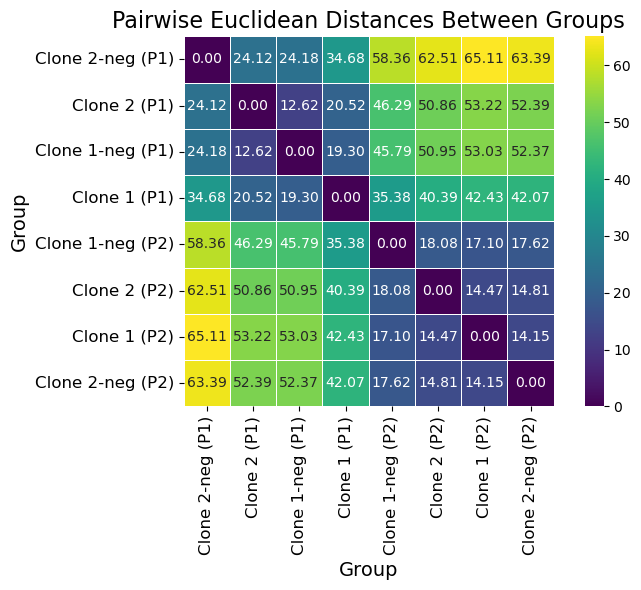

In [29]:
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate distances
distances = squareform(pdist(group_means.T, metric='euclidean'))

# Step 2: Build DataFrame
distance_df = pd.DataFrame(distances, index=group_means.columns, columns=group_means.columns)
distance_df = distance_df.rename(index=group_name_map, columns=group_name_map)

# Step 3: Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    distance_df,
    annot=True,
    fmt=".2f",    # 🔥 Fix: Force two decimals in the numbers
    cmap='viridis',
    linewidths=0.5,
    square=True
)

plt.title("Pairwise Euclidean Distances Between Groups", fontsize=16)
plt.xlabel("Group", fontsize=14)
plt.ylabel("Group", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


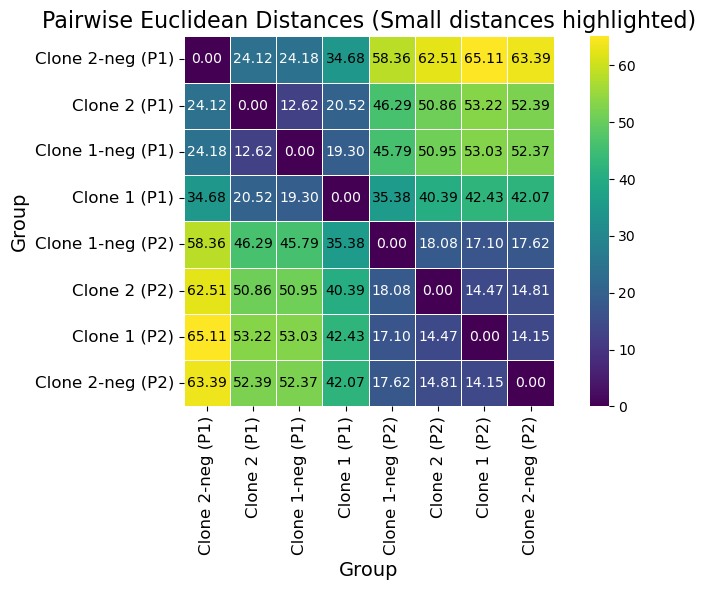

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))

# Create heatmap without annot first
ax = sns.heatmap(
    distance_df,
    cmap='viridis',
    linewidths=0.5,
    square=True,
    cbar=True
)

# Add manual annotations with custom colors
for i in range(distance_df.shape[0]):
    for j in range(distance_df.shape[1]):
        distance = distance_df.iloc[i, j]
        text_color = 'white' if distance < 30 else 'black'   # 🔥 Highlight small distances
        ax.text(j + 0.5, i + 0.5, f"{distance:.2f}", ha='center', va='center', color=text_color, fontsize=10)

plt.title("Pairwise Euclidean Distances (Small distances highlighted)", fontsize=16)
plt.xlabel("Group", fontsize=14)
plt.ylabel("Group", fontsize=14)
plt.xticks(np.arange(len(distance_df.columns)) + 0.5, distance_df.columns, fontsize=12)
plt.yticks(np.arange(len(distance_df.index)) + 0.5, distance_df.index, fontsize=12)
plt.tight_layout()
plt.tight_layout()

#plt.savefig(r"C:\Users\MunozestraJ\OneDrive - Cedars-Sinai Health System\Proteomics\Dox experiment\Euclidean Distances.svg", format="svg")
plt.show()

In [31]:
new_df = df_imputed.copy()

print(new_df.shape)
print(new_df.index[:5])
print(new_df.columns[:5])
print(new_df.isnull().sum().sum())

(9782, 37)
Index(['NUDT4B', 'NBPF1;NBPF10;NBPF19;NBPF20;NBPF8;NBPF9', 'GATD3;GATD3B',
       'PIGBOS1', 'TMEM275'],
      dtype='object', name='Genes')
Index(['A1_20250325224911', 'A2', 'A3', 'A4', 'A5'], dtype='object')
0


In [32]:
# Extract first letter from sample names (Group A, B, C, etc.)
group_labels = [col[0] for col in new_df.columns]

# Map sample to group
sample_to_group = {sample: group for sample, group in zip(new_df.columns, group_labels)}

# Build group-wise average
group_means = pd.DataFrame()

for group in sorted(set(group_labels)):
    group_samples = [sample for sample in new_df.columns if sample_to_group[sample] == group]
    group_means[group] = new_df[group_samples].mean(axis=1)

print(group_means.shape)  # Should be (genes, 8 groups)

(9782, 8)


In [33]:
from scipy.spatial.distance import pdist, squareform

# Euclidean
euclidean_distances = squareform(pdist(group_means.T, metric='euclidean'))

# Make it a DataFrame
euclidean_df = pd.DataFrame(
    euclidean_distances,
    index=group_means.columns,
    columns=group_means.columns
)

In [34]:
# Cosine
cosine_distances = squareform(pdist(group_means.T, metric='cosine'))

# Make it a DataFrame
cosine_df = pd.DataFrame(
    cosine_distances,
    index=group_means.columns,
    columns=group_means.columns
)

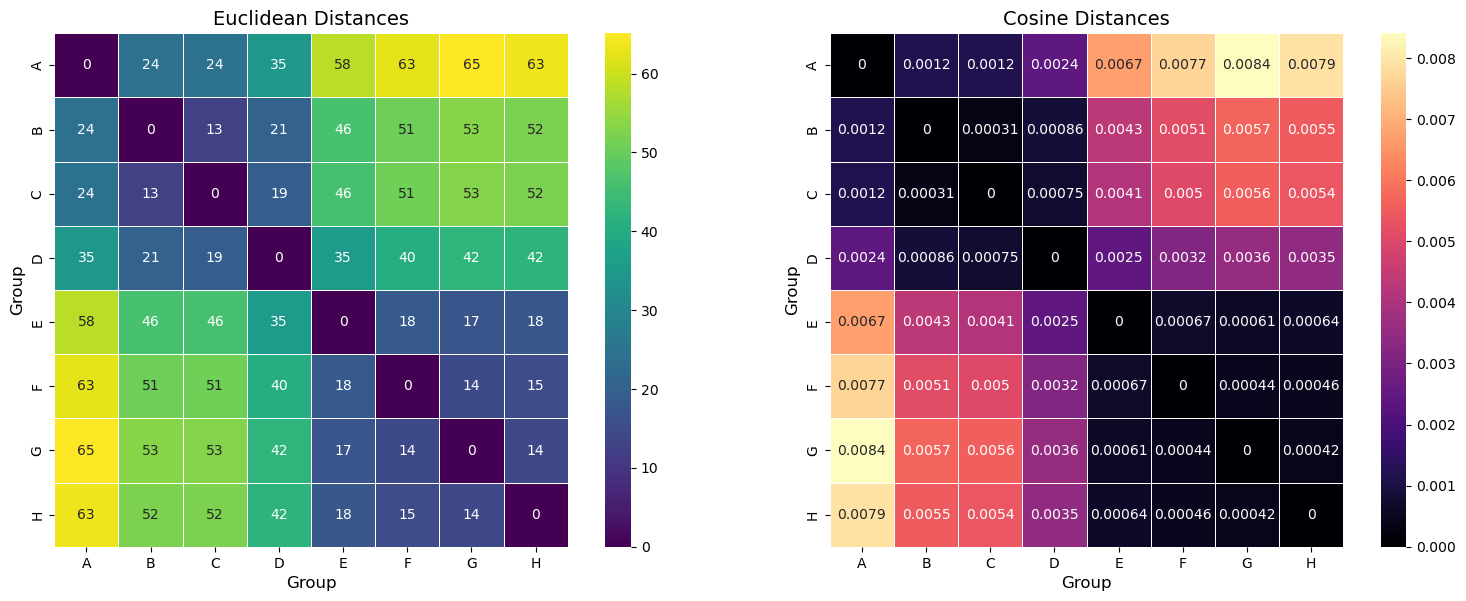

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Euclidean
sns.heatmap(
    euclidean_df,
    annot=True,
    cmap="viridis",
    linewidths=0.5,
    square=True,
    ax=axs[0]
)
axs[0].set_title("Euclidean Distances", fontsize=14)
axs[0].set_xlabel("Group", fontsize=12)
axs[0].set_ylabel("Group", fontsize=12)

# Cosine
sns.heatmap(
    cosine_df,
    annot=True,
    cmap="magma",
    linewidths=0.5,
    square=True,
    ax=axs[1]
)
axs[1].set_title("Cosine Distances", fontsize=14)
axs[1].set_xlabel("Group", fontsize=12)
axs[1].set_ylabel("Group", fontsize=12)

plt.tight_layout()
plt.show()

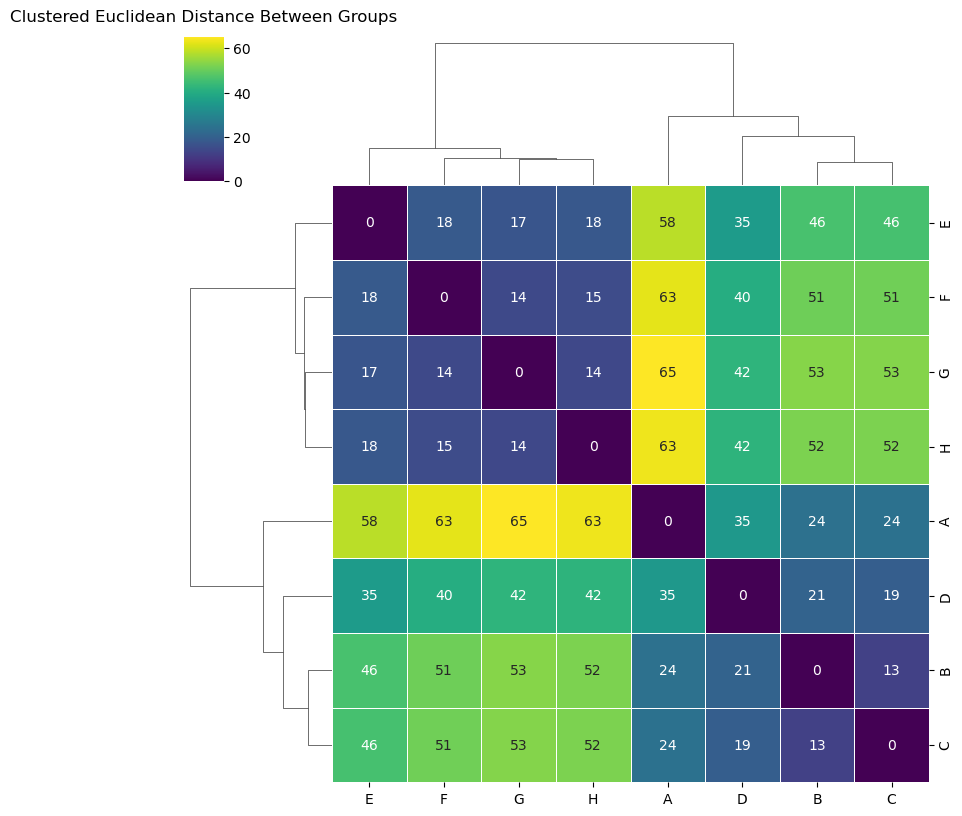

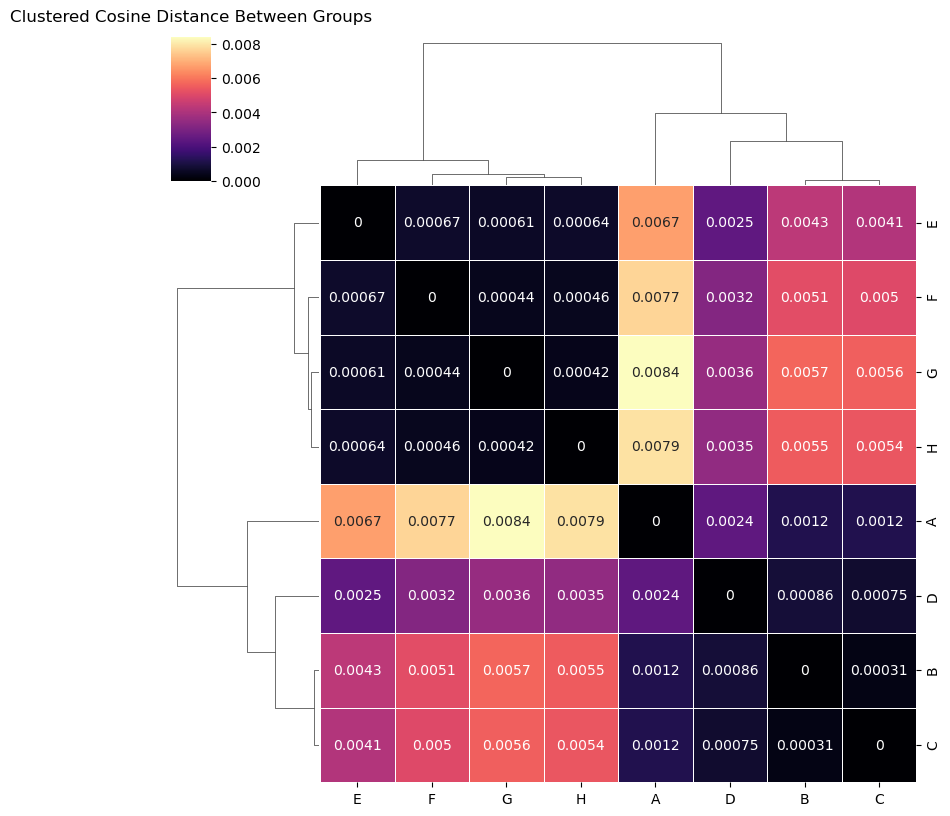

In [36]:
# Clustered Euclidean Distance
sns.clustermap(
    euclidean_df,
    cmap="viridis",
    annot=True,
    linewidths=0.5,
    figsize=(8, 8)
)
plt.title("Clustered Euclidean Distance Between Groups", y=1.05)
plt.show()

# Clustered Cosine Distance
sns.clustermap(
    cosine_df,
    cmap="magma",
    annot=True,
    linewidths=0.5,
    figsize=(8, 8)
)
plt.title("Clustered Cosine Distance Between Groups", y=1.05)
plt.show()